In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r)
     )

Single Tree:0.9074074074074074 Random Forest:0.9814814814814815


### compare random forest Vs Decision tree under cross-exam

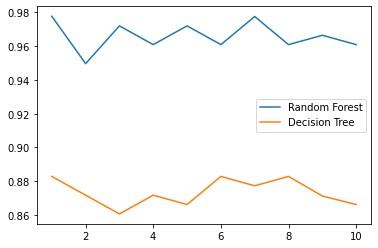

In [10]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=5).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=15).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

## tuning n-estimators


0.9888888888888889 40


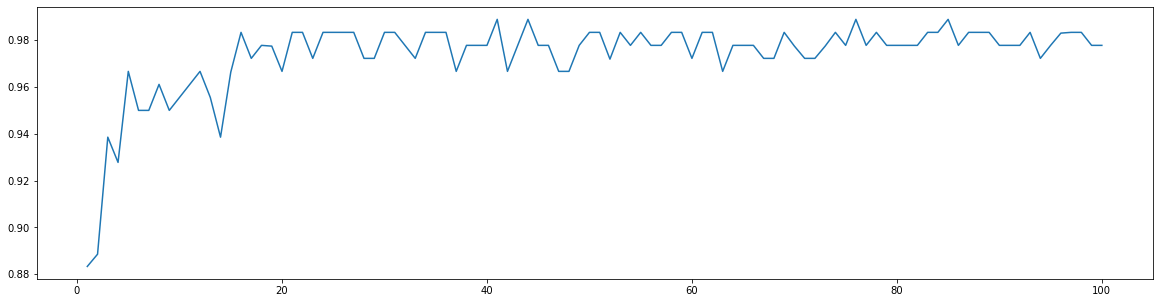

In [11]:
#####【TIME WARNING: 2mins 30 seconds】#####
superpa = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)

### feature display

In [13]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
rfc.feature_importances_



array([0.1157849 , 0.00476575, 0.01287745, 0.02556009, 0.01108411,
       0.03081935, 0.14163459, 0.00652847, 0.02415062, 0.21184363,
       0.17557386, 0.07176821, 0.16760898])

In [15]:
rfc.apply(Xtest)
rfc.predict(Xtest)


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0,
       2, 1, 2, 1, 1, 2, 0, 1, 2, 2])

In [16]:
rfc.predict_proba(Xtest)

array([[1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.68, 0.32, 0.  ],
       [0.  , 0.96, 0.04],
       [0.04, 0.96, 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.8 , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.96, 0.  , 0.04],
       [0.04, 0.32, 0.64],
       [0.24, 0.52, 0.24],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [0.32, 0.6 , 0.08],
       [0.88, 0.04, 0.08],
       [0.08, 0.12, 0.8 ],
       [1.  , 0.  , 0.  ],
       [0.84, 0.16, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.72, 0.28, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.64, 0.32, 0.04],
       [0.6 , 0.4 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.  , 0.92],
       [0.04, 0.08, 0.88],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.12, 0.32, 0.56],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
 